## Exercise 4

Identify a data set online (5 points) that you find interesting that could potentially be used for the final project; the main requirements is that there needs to be many (hundreds or more) data items with several identifiable variables, at least one of which could be viewed as an output variable that you could predict from the others.

Describe the dataset (5 points) Your answer should address (but not be limited to): how many variables? Are the key variables explicitly specified or are they things you would have to derive (e.g. by inferring from text)? Are any of the variables exactly derivable from other variables? (i.e. are any of them redundant?) Are there any variables that could in principle be statistically predicted from other variables? How many rows/data points are there? Is the data in a standard format? If not, how could you convert it to a standard format?

Describe the terms of use and identify any key restrictions (e.g. do you have to officially apply to get access to the data? Are there certain types of analyses you can't do?) (5 points) 

Remember: if you can't find explicit permission to use a given dataset, assume that you cannot do so.

Do data exploration on the dataset, and present a representative set of figures that gives insight into the data. Comment on the insights gained. (5 points)

Identify any data cleaning needs (this includes checking for missing data) and write code to perform them. If the data does not need to be cleaned, explain how you reached this conclusion. (5 points)

## Response 

### Dataset Identified 

 The Health Information National Trends Survey (HINTS). I chose the HINTS 5, Cycle 3 (2019) dataset, updated April 2021 version. It has Total respondents: 5,438, Complete responses: 5,247, Partial responses: 191. The survey collects nationally representative data routinely about the American public's use of cancer-related information. It is a large dataset with several identifible variables. As per the research question, several variables can be viewed as an output variable that could be predicted from other variable. Dataset Link : https://hints.cancer.gov/data/download-data.aspx (can't be uploaded to GitHub due to large volume of data).

### Dataset Description 

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from plotnine import *
import warnings
warnings.filterwarnings("ignore")

In [141]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [142]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [143]:
HINTS_data = pd.read_spss("/Users/mahimakaur/Desktop/hints5_cycle3_public.sav")

In [144]:
HINTS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5438 entries, 0 to 5437
Columns: 730 entries, HHID to IncomeRanges_IMP
dtypes: category(368), float64(360), object(2)
memory usage: 17.1+ MB


In [145]:
HINTS_data.head()

,HHID,PersonID,Stratum,APP_REGION,HIGHSPANLI,HISPSURNAME,HISP_HH,RUC2003,RUC2013,PR_RUCA_2010,SEC_RUCA_2010,DRA,Treatment_H5C3,NCHSURCODE2013,CENSDIV,CENSREG,VAR_STRATUM,VAR_CLUSTER,FormType,Language_Flag,QDisp,UpdateDate,AdultsInHH,MailHHAdults,SeekHealthInfo,WhereSeekHealthInfo,WhoLookingFor,LotOfEffort,Frustrated,ConfidentGetHealthInf,TrustDoctor,TrustFamily,TrustGov,TrustCharities,TrustReligiousOrgs,StrongNeedHealthInfo,StrongNeedHealthInfo_OS,SeekCancerInfo,UseInternet,Internet_DialUp,Internet_BroadBnd,Internet_Cell,Internet_WiFi,InternetCancerInfoSelf,WhereUseInternet_Home,WhereUseInternet_Work,WhereUseInternet_PublicPlace,WhereUseInternet_MobileDevice,Electronic_SelfHealthInfo,Electronic_BuyMedicine,Electronic_TalkDoctor,Electronic_TrackedHealthCosts,Electronic_TestResults,Electronic_MadeAppts,Electronic_ECigHarms,HaveDevice_Tablet,HaveDevice_SmartPh,HaveDevice_CellPh,HaveDevice_None,HaveDevice_Cat,TabletHealthWellnessApps,Tablet_AchieveGoal,Tablet_MakeDecision,Tablet_DiscussionsHCP,WearableDevTrackHealth,FreqWearDevTrackHealth,WillingShareData_HCP,WillingShareData_Fam,OtherDevTrackHealth2,SharedHealthDeviceInfo,IntRsn_VisitedSocNet,IntRsn_SharedSocNet,IntRsn_WroteBlog,IntRsn_SupportGroup,IntRsn_YouTube,TextFromDoctor,RegularProvider,FreqGoProvider,QualityCare,FreqGoUrgentCare,QualityCareUrgentCare,ChanceAskQuestions,FeelingsAddressed,InvolvedDecisions,UnderstoodNextSteps,ExplainedClearly,SpentEnoughTime,HelpUncertainty,HealthIns_InsuranceEmp,HealthIns_InsurancePriv,HealthIns_Medicare,HealthIns_Medicaid,HealthIns_Tricare,HealthIns_VA,HealthIns_IHS,HealthIns_Other,HealthIns_Other_OS,HealthInsurance,ProviderMaintainEMR2,OfferedAccessHCP2,OfferedAccessInsurer2,AccessOnlineRecord,NotAccessed_SpeakDirectly,NotAccessed_NoInternet,NotAccessed_NoNeed,NotAccessed_ConcernedPrivacy,NotAccessed_NoRecord,NotAccessed_LogInProb,NotAccessed_Uncomfortable,NotAccessed_MultipleRec,RecordsOnline_RefillMeds,RecordsOnline_ViewResults,RecordsOnline_RequestCorrection,RecordsOnline_MessageHCP,RecordsOnline_DownloadHealth,RecordsOnline_AddHealthInfo,RecordsOnline_MakeDecision,AccessUsingHealthApp,OnlineRecClinNotes,ESent_AnotherHCP,ESent_Family,ESent_HealthApp,UnderstandOnlineMedRec,UsefulOnlineMedRec,Caregiving_Child,Caregiving_Spouse,Caregiving_Parent,Caregiving_AnotherFam,Caregiving_Friend,Caregiving_No,CaregivingWho_Cat,Caregiving_Professional,Caregiving_HoursPerWeek2,Caregiving_Cancer,Caregiving_Alzheimers,Caregiving_OrthoMusc,Caregiving_MentalHealth,Caregiving_ChronicCond,Caregiving_NeuroDev,Caregiving_AcuteCond,Caregiving_Aging,Caregiving_NotSure,Caregiving_Other,Caregiving_Other_OS,CaregivingCond_Cat,Caregiving_AccessMedRec,GeneralHealth,OwnAbilityTakeCareHealth,AvoidDoc,Deaf,TalkHealthFriends,MedConditions_Diabetes,MedConditions_HighBP,MedConditions_HeartCondition,MedConditions_LungDisease,MedConditions_Depression,Height_Feet,Height_Inches,Weight,WeightPerception,WeightIntention,LittleInterest,Hopeless,Nervous,Worrying,ChangeThinking,ConsiderFuture,Fruit,Vegetables,AverageCaloriesPerDay,AverageCaloriesPerDay_DK,NoticeCalorieInfoOnMenu,UnderstandCalorieInfo,CalorieInfo_FewerCalories,CalorieInfo_MoreCalories,CalorieInfo_FewerItems,CalorieInfo_SmallerSizes,CalorieInfo_MoreItems,CalorieInfo_LargerSizes,DrinkDaysPerWeek,DrinksPerDay,AlcoholConditions_Cancer,AlcoholConditions_HeartDisease,AlcoholConditions_Diabetes,AlcoholConditions_LiverDisease,HCPAlcoholConsequences,TimesModerateExercise,HowLongModerateExerciseMinutes,TimesStrengthTraining,AverageTimeSitting,EnjoyExercise,RegExercise_Pressure,RegExercise_Appearance,RegExercise_Guilt,RegExercise_Enjoyment,GovPARec_HCP,GovPARec_Internet,GovPARec_TV,GovPARec_Magazine,ExRec_IncreasedEx,ExRec_DecreasedEx,ExRec_ChangedEx,ExRec_LookedInfo,ExRec_NoChange,ExRec_NotHeard,ExRec_Cat,PhysAct_HelpSleep,PhysAct_ReduceAnxiety,PhysAct_ReducePain,AverageSleepNight,AverageSleepQuality,MorningNightPerson,SpendTimeInSunTanning,EnjoyTimeInSun,TimesSunburned,Sunburned_JobOutside,Sunburned_HomeOutside,Sunburned_Su

In [146]:
HINTS_data.shape

(5438, 730)

In [147]:
HINTS_data.dtypes

HHID                                float64 
PersonID                            object  
Stratum                             category
APP_REGION                          category
HIGHSPANLI                          category
HISPSURNAME                         category
HISP_HH                             category
RUC2003                             category
RUC2013                             category
PR_RUCA_2010                        category
SEC_RUCA_2010                       category
DRA                                 category
Treatment_H5C3                      category
NCHSURCODE2013                      category
CENSDIV                             category
CENSREG                             category
VAR_STRATUM                         category
VAR_CLUSTER                         float64 
FormType                            category
Language_Flag                       category
QDisp                               category
UpdateDate                          object  
AdultsInHH

In [148]:
HINTS_data.count()

HHID                                5438
PersonID                            5438
Stratum                             5438
APP_REGION                          5438
HIGHSPANLI                          5438
HISPSURNAME                         5438
HISP_HH                             5438
RUC2003                             5438
RUC2013                             5438
PR_RUCA_2010                        5438
SEC_RUCA_2010                       5438
DRA                                 5438
Treatment_H5C3                      5438
NCHSURCODE2013                      5438
CENSDIV                             5438
CENSREG                             5438
VAR_STRATUM                         5438
VAR_CLUSTER                         5438
FormType                            5438
Language_Flag                       5438
QDisp                               5438
UpdateDate                          5438
AdultsInHH                          5438
MailHHAdults                        5438
SeekHealthInfo  

In [149]:
HINTS_data.describe(include = 'all')

,HHID,PersonID,Stratum,APP_REGION,HIGHSPANLI,HISPSURNAME,HISP_HH,RUC2003,RUC2013,PR_RUCA_2010,SEC_RUCA_2010,DRA,Treatment_H5C3,NCHSURCODE2013,CENSDIV,CENSREG,VAR_STRATUM,VAR_CLUSTER,FormType,Language_Flag,QDisp,UpdateDate,AdultsInHH,MailHHAdults,SeekHealthInfo,WhereSeekHealthInfo,WhoLookingFor,LotOfEffort,Frustrated,ConfidentGetHealthInf,TrustDoctor,TrustFamily,TrustGov,TrustCharities,TrustReligiousOrgs,StrongNeedHealthInfo,StrongNeedHealthInfo_OS,SeekCancerInfo,UseInternet,Internet_DialUp,Internet_BroadBnd,Internet_Cell,Internet_WiFi,InternetCancerInfoSelf,WhereUseInternet_Home,WhereUseInternet_Work,WhereUseInternet_PublicPlace,WhereUseInternet_MobileDevice,Electronic_SelfHealthInfo,Electronic_BuyMedicine,Electronic_TalkDoctor,Electronic_TrackedHealthCosts,Electronic_TestResults,Electronic_MadeAppts,Electronic_ECigHarms,HaveDevice_Tablet,HaveDevice_SmartPh,HaveDevice_CellPh,HaveDevice_None,HaveDevice_Cat,TabletHealthWellnessApps,Tablet_AchieveGoal,Tablet_MakeDecision,Tablet_DiscussionsHCP,WearableDevTrackHealth,FreqWearDevTrackHealth,WillingShareData_HCP,WillingShareData_Fam,OtherDevTrackHealth2,SharedHealthDeviceInfo,IntRsn_VisitedSocNet,IntRsn_SharedSocNet,IntRsn_WroteBlog,IntRsn_SupportGroup,IntRsn_YouTube,TextFromDoctor,RegularProvider,FreqGoProvider,QualityCare,FreqGoUrgentCare,QualityCareUrgentCare,ChanceAskQuestions,FeelingsAddressed,InvolvedDecisions,UnderstoodNextSteps,ExplainedClearly,SpentEnoughTime,HelpUncertainty,HealthIns_InsuranceEmp,HealthIns_InsurancePriv,HealthIns_Medicare,HealthIns_Medicaid,HealthIns_Tricare,HealthIns_VA,HealthIns_IHS,HealthIns_Other,HealthIns_Other_OS,HealthInsurance,ProviderMaintainEMR2,OfferedAccessHCP2,OfferedAccessInsurer2,AccessOnlineRecord,NotAccessed_SpeakDirectly,NotAccessed_NoInternet,NotAccessed_NoNeed,NotAccessed_ConcernedPrivacy,NotAccessed_NoRecord,NotAccessed_LogInProb,NotAccessed_Uncomfortable,NotAccessed_MultipleRec,RecordsOnline_RefillMeds,RecordsOnline_ViewResults,RecordsOnline_RequestCorrection,RecordsOnline_MessageHCP,RecordsOnline_DownloadHealth,RecordsOnline_AddHealthInfo,RecordsOnline_MakeDecision,AccessUsingHealthApp,OnlineRecClinNotes,ESent_AnotherHCP,ESent_Family,ESent_HealthApp,UnderstandOnlineMedRec,UsefulOnlineMedRec,Caregiving_Child,Caregiving_Spouse,Caregiving_Parent,Caregiving_AnotherFam,Caregiving_Friend,Caregiving_No,CaregivingWho_Cat,Caregiving_Professional,Caregiving_HoursPerWeek2,Caregiving_Cancer,Caregiving_Alzheimers,Caregiving_OrthoMusc,Caregiving_MentalHealth,Caregiving_ChronicCond,Caregiving_NeuroDev,Caregiving_AcuteCond,Caregiving_Aging,Caregiving_NotSure,Caregiving_Other,Caregiving_Other_OS,CaregivingCond_Cat,Caregiving_AccessMedRec,GeneralHealth,OwnAbilityTakeCareHealth,AvoidDoc,Deaf,TalkHealthFriends,MedConditions_Diabetes,MedConditions_HighBP,MedConditions_HeartCondition,MedConditions_LungDisease,MedConditions_Depression,Height_Feet,Height_Inches,Weight,WeightPerception,WeightIntention,LittleInterest,Hopeless,Nervous,Worrying,ChangeThinking,ConsiderFuture,Fruit,Vegetables,AverageCaloriesPerDay,AverageCaloriesPerDay_DK,NoticeCalorieInfoOnMenu,UnderstandCalorieInfo,CalorieInfo_FewerCalories,CalorieInfo_MoreCalories,CalorieInfo_FewerItems,CalorieInfo_SmallerSizes,CalorieInfo_MoreItems,CalorieInfo_LargerSizes,DrinkDaysPerWeek,DrinksPerDay,AlcoholConditions_Cancer,AlcoholConditions_HeartDisease,AlcoholConditions_Diabetes,AlcoholConditions_LiverDisease,HCPAlcoholConsequences,TimesModerateExercise,HowLongModerateExerciseMinutes,TimesStrengthTraining,AverageTimeSitting,EnjoyExercise,RegExercise_Pressure,RegExercise_Appearance,RegExercise_Guilt,RegExercise_Enjoyment,GovPARec_HCP,GovPARec_Internet,GovPARec_TV,GovPARec_Magazine,ExRec_IncreasedEx,ExRec_DecreasedEx,ExRec_ChangedEx,ExRec_LookedInfo,ExRec_NoChange,ExRec_NotHeard,ExRec_Cat,PhysAct_HelpSleep,PhysAct_ReduceAnxiety,PhysAct_ReducePain,AverageSleepNight,AverageSleepQuality,MorningNightPerson,SpendTimeInSunTanning,EnjoyTimeInSun,TimesSunburned,Sunburned_JobOutside,Sunburned_HomeOutside,Sunburned_Su

#### Converting the dataset into a standard format (SPSS to CSV)

In [150]:
import pyreadstat

In [151]:
df, metadata = pyreadstat.read_sav("/Users/mahimakaur/Desktop/hints5_cycle3_public.sav")
csv_file = df.to_csv("/Users/mahimakaur/Desktop/hints5_cycle3_public.csv")

#### Dataset Description 

 - HINTS measures how people access and use health information; how people use information technology to manage health and health information; and the degree to which people are engaged in healthy behaviors. Finally, several items in HINTS have a specific focus on cancer prevention and control. <br>
 - The dataset has 5438 rows and 730 columns(variables).<br>
 - The data types include : category(368), float64(360), object(2). <br>
 - The key variables are key variables explicitly specified. I did not find any varibale can be eactly derivable from other varibale. Each question in the survey interview is a unique question. <br>
 - There are no redundant data variables. Nationally representative HINTS data are free to download and analyze.<br>
 - The dataset contains variables that could in principle be statistically predicted from other variables.It depends on the research question. For example : a) multivariable logistic regression models can be fitted to estimate predictors of achieving health goals with the help of smartphone or tablet and sending or receiving an SMS text message to or from a health care provider. b) ordinal logistic regression models can be used identify predictors of high trust in doctors and the internet separately for cancer-seeking information. c) Additionally, subgroup-specific analyses of HINTS data can be used to inform tailored cancer control planning efforts (e.g., by gender, race/ethnicity, socioeconomic status, cancer history).The dataset can be used to determine which individual health behaviors (e.g., fruit consumption, physical activity, and sleep) are associated with psychological health among cancer survivors and 2) determine if the number of health behaviors engaged in is associated with better psychological health among cancer survivors. <br>
 - HINTS data are available in SAS, SPSS, and STATA formats. It is not available in standard formats like csv, json, xml. I converted the spss file to csv using the above mentioned code. <br> 

### Terms of Use and Identification of Key Restrictions

The dataset is freely available to use. If one requires access to detailed geographic information or variables that have been suppressed in the public use datasets, then one needs to  visit the Request Restricted HINTS Datasets page to request restricted-use HINTS data. The individual can either fill out and submit the interactive form below or fill out the Restricted Data Request Form and email it to NCIHINTS@mail.nih.gov for review. The survey has comprehensive documentation(survey instrument,data files, codebooks, design documents, methodology, and more) for public use.In order to help cultivate a community of HINTS users, the organization has asked to let them know about published HINTS-related articles so that these can be posted on the HINTS Web site.

In my opinion geospatial analyses cannot be done on publically available dataset.Because HINTS is a cross-sectional survey, it is not possible to infer causal relationships between constructs or items in the survey. Additionally, while researchers can examine trends over time at the national level for outcomes included in multiple iterations of the survey, one cannot assess change over time at the individual level.

Since, we can perform logistic and linear regressions, k-means, and examine trends over time it can be a potentiate dataset for the final project. Additionally, Because of common sampling procedures used across the repeated, cross-sectional HINTS surveys, each HINTS iteration can be considered as an independent sample of the non-institutionalized US adult population 18 and older. Thus, iterations can be merged together to look at patterns over time and yield larger sample size. 

### Exploratory Data Analysis

#### Exploring information about the marital status

In [152]:
#MaritalStatus: O2. What is your marital status?
#Variable Name: MaritalStatus

HINTS_MaritalStatus = HINTS_data['MaritalStatus'].value_counts(normalize=True) * 100
print(HINTS_MaritalStatus)

Married                                                47.591026
Single, never been married                             16.219198
Divorced                                               15.318132
Widowed                                                10.904744
Living as married or living with a romantic partner    4.762780 
Missing data (Not Ascertained)                         2.206694 
Separated                                              2.059581 
Missing data (Web partial - Question Never Seen)       0.790732 
Multiple responses selected in error                   0.147113 
Name: MaritalStatus, dtype: float64


Text(0, 0.5, 'Count')

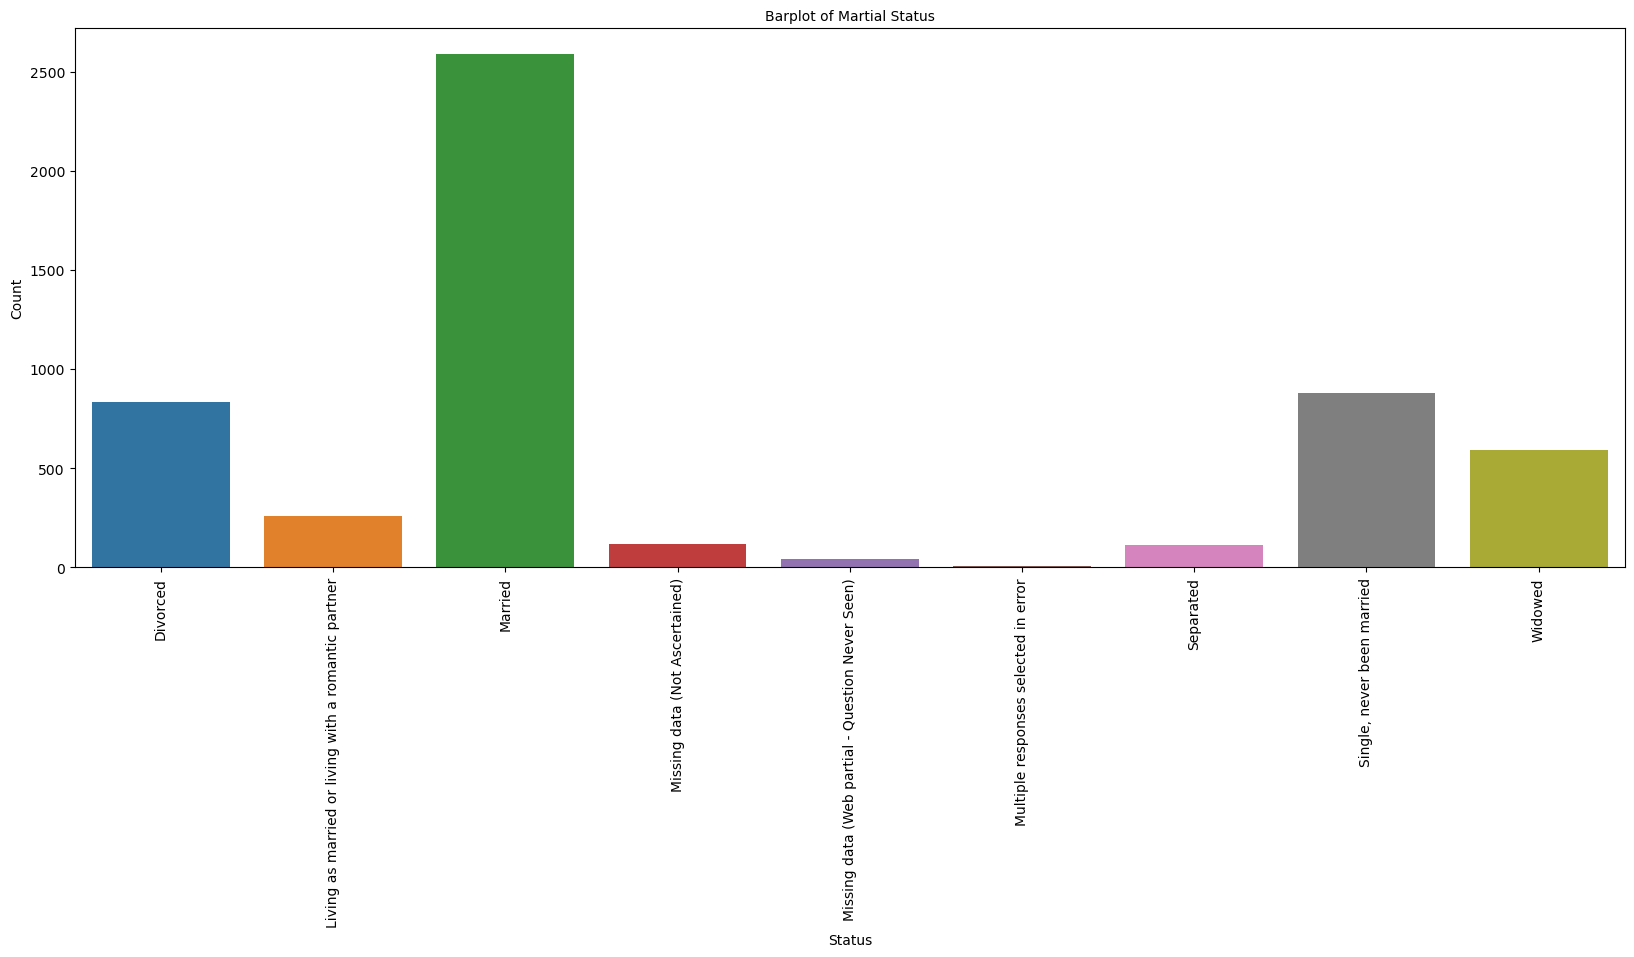

In [153]:
plt.figure(figsize = (20,7))
sns.countplot(HINTS_data['MaritalStatus'])
plt.title("Barplot of Martial Status", fontsize = 10)
plt.xlabel("Status", fontsize = 10)
plt.xticks(rotation=90) 
plt.ylabel("Count", fontsize = 10)

#### Exploring Information about the education status 

In [154]:
#Education: O3. What is the highest grade or level of schooling you completed?
#Variable Name: Education

HINTS_Education = HINTS_data['Education'].value_counts(normalize=True) * 100
print(HINTS_Education)

College graduate                                               25.781537
Some college                                                   22.048547
Postgraduate                                                   18.536227
12 years or completed high school                              17.396102
Post high school training other than college (vocational or    7.208533 
8 through 11 years                                             4.670835 
Missing data (Not Ascertained)                                 2.096359 
Less than 8 years                                              1.471129 
Missing data (Web partial - Question Never Seen)               0.790732 
Name: Education, dtype: float64


Text(0, 0.5, 'Count')

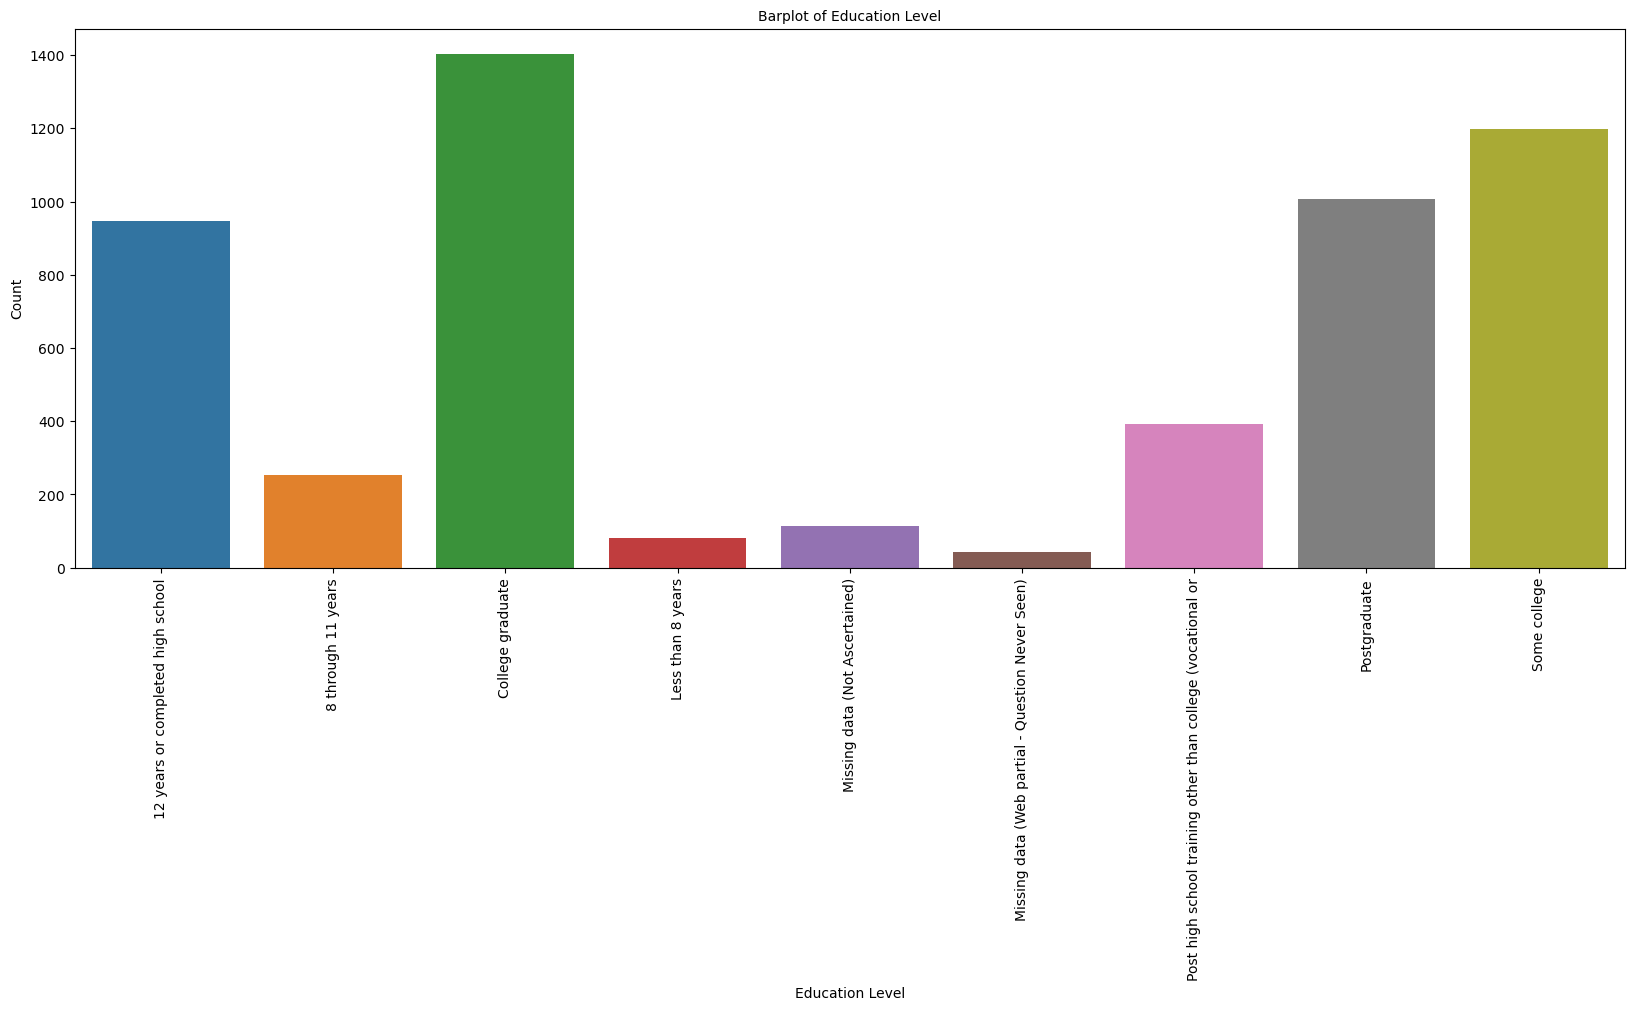

In [155]:
plt.figure(figsize = (20,7))
sns.countplot(HINTS_data['Education'])
plt.title("Barplot of Education Level", fontsize = 10)
plt.xlabel("Education Level", fontsize = 10)
plt.xticks(rotation=90) 
plt.ylabel("Count", fontsize = 10)

#### Exploring the dataset to get insights about the diagnosis of cancer

In [156]:
#EverHadCancer: M1. Have you ever been diagnosed as having cancer?
##Variable Name: EverHadCancer

HINTS_Cancerdiagnosis = HINTS_data['EverHadCancer'].value_counts(normalize=True) * 100
print(HINTS_Cancerdiagnosis)

No                                                  82.199338
Yes                                                 15.741081
Missing data (Not Ascertained)                      1.324016 
Missing data (Web partial - Question Never Seen)    0.735565 
Name: EverHadCancer, dtype: float64


#### Exploring the dataset to get insights about the diagnosis of hypertension 

In [157]:
#MedConditions_HighBP: 
##F6b. Has a doctor or other health professional ever told you that you had high blood pressure or hypertension?
#Variable Name: MedConditions_HighBP

HINTS_HighBP = HINTS_data['MedConditions_HighBP'].value_counts(normalize=True) * 100
print(HINTS_HighBP)

No                                                  53.641045
Yes                                                 43.949982
Missing data (Not Ascertained)                      2.225083 
Missing data (Web partial - Question Never Seen)    0.183891 
Name: MedConditions_HighBP, dtype: float64


#### Exploring the dataset to get insights about the fruits intake of the participants 

In [158]:
## Fruit: G1. About how many cups of fruit (including 100% pure fruit juice) do you eat or drink each day?
##Variable Name: Fruit

HINTS_Fruits = HINTS_data['Fruit'].value_counts(normalize=True) * 100
print(HINTS_Fruits)

1 to 2 cups                                         28.080177
1/2 cup to 1 cup                                    25.248253
1/2 cup or less                                     17.910997
None                                                11.162192
2 to 3 cups                                         10.003678
3 to 4 cups                                         3.218095 
4 or more cups                                      2.114748 
Missing data (Not Ascertained)                      1.581464 
Multiple responses selected in error                0.404561 
Missing data (Web partial - Question Never Seen)    0.275837 
Name: Fruit, dtype: float64


Text(0, 0.5, 'Count')

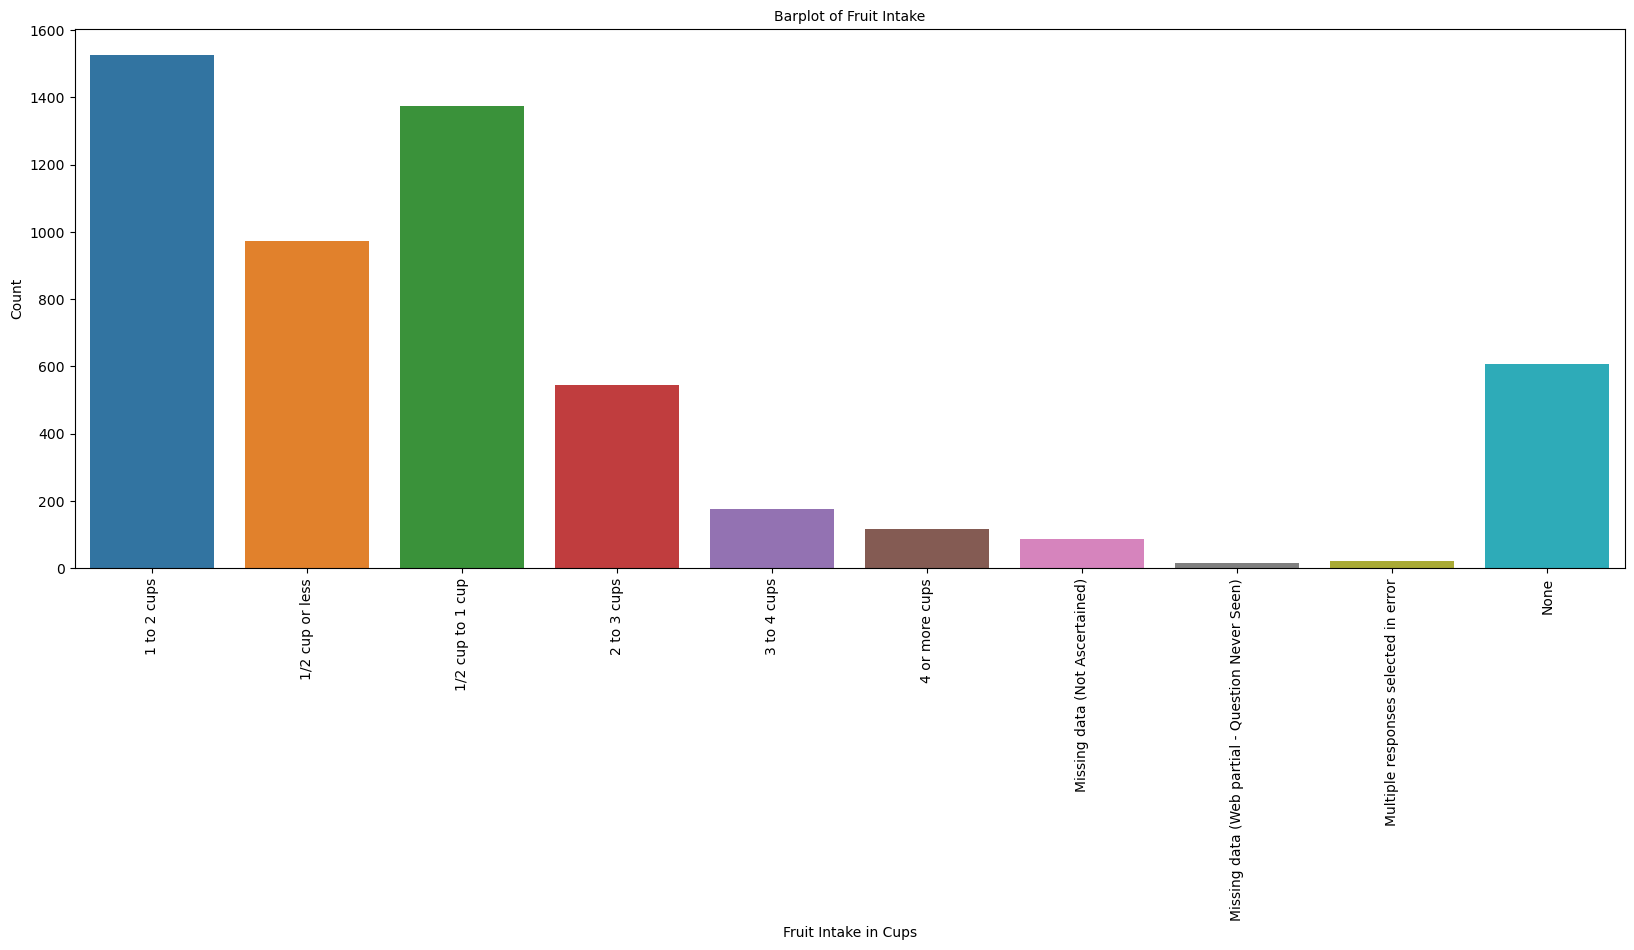

In [159]:
plt.figure(figsize = (20,7))
sns.countplot(HINTS_data['Fruit'])
plt.title("Barplot of Fruit Intake", fontsize = 10)
plt.xlabel("Fruit Intake in Cups", fontsize = 10)
plt.xticks(rotation=90) 
plt.ylabel("Count", fontsize = 10)

#### Visualization Between Diagnosis of BP and Fruit Intake 

In [160]:
## Slicing the Dataset as per the requirement

BP = HINTS_data[['MedConditions_HighBP', 'Fruit']]
BP1 = BP[BP["MedConditions_HighBP"].isin(['Yes', 'No'])]
BP2 = BP1[BP1["Fruit"].isin(['None', '1/2 cup or less', 
                             '1/2 cup to 1 cup ', '1 to 2 cups', '2 to 3 cups', '3 to 4 cups', '4 or more cups'])]

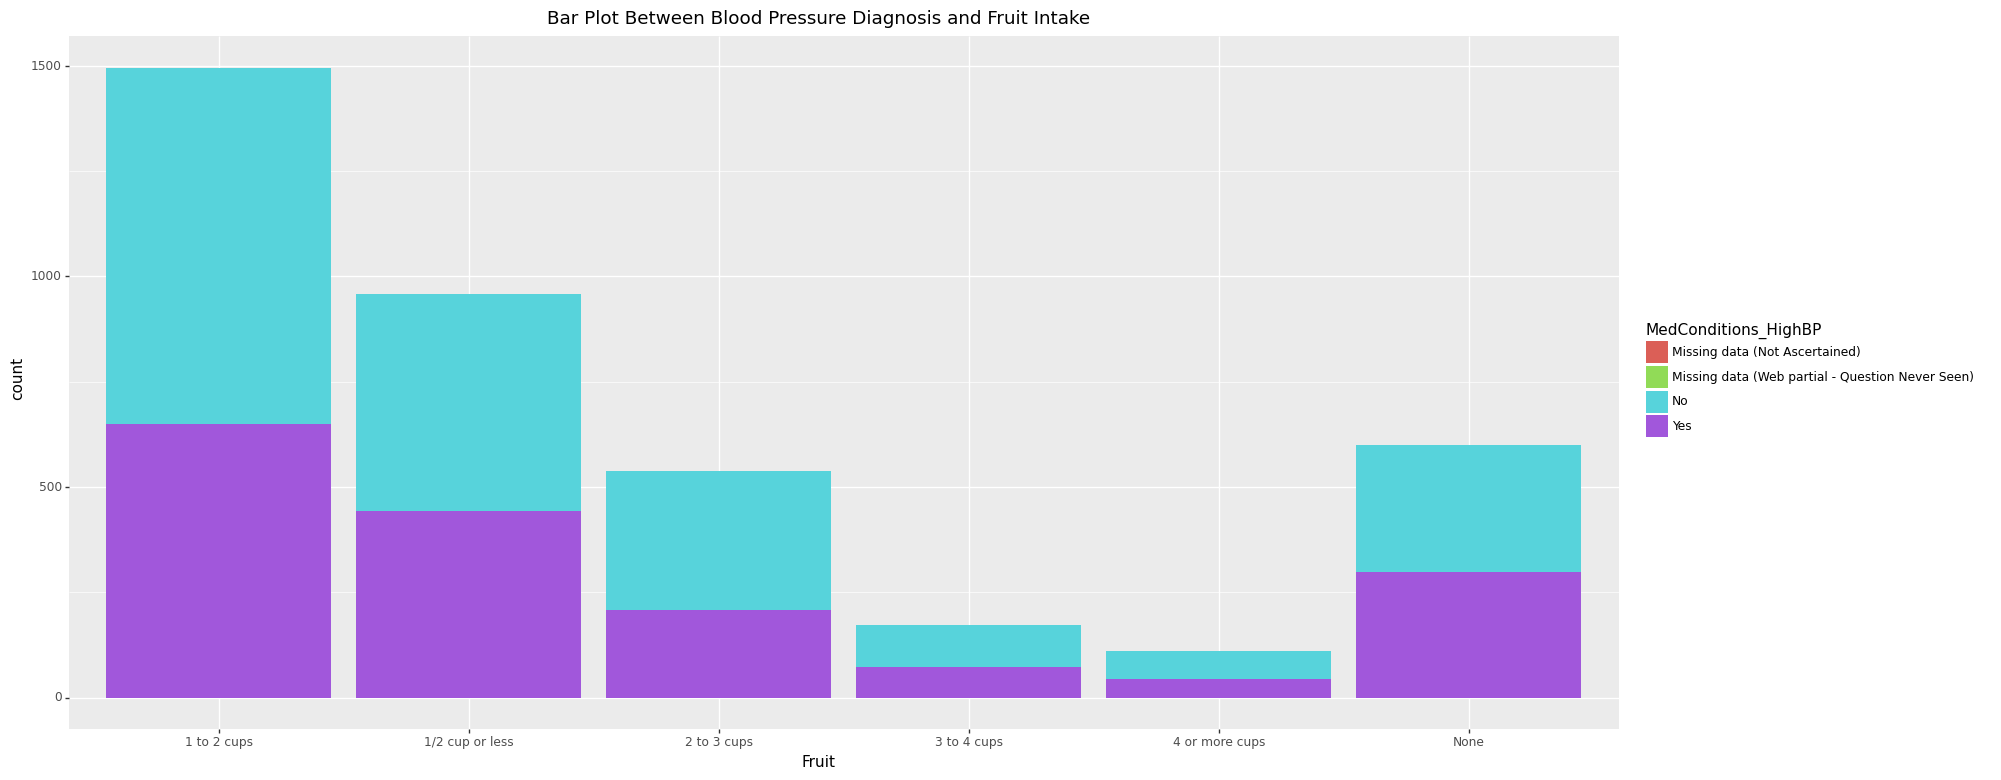

<ggplot: (8777682958695)>

In [161]:
## Creating a ggplot 

ggplot(BP2, aes(x='Fruit',fill = 'MedConditions_HighBP')) + \
    geom_bar(stat = 'count') + \
    ggtitle("Bar Plot Between Blood Pressure Diagnosis and Fruit Intake") + \
    theme(figure_size=(20, 9)) 

#### Exploring the dataset to get insights about the smoking patterns 

In [162]:
#Smoke100: K1. Have you smoked at least 100 cigarettes in your entire life?
#Variable Name: Smoke100

HINTS_Smoke = HINTS_data['Smoke100'].value_counts(normalize=True) * 100
print(HINTS_Smoke)

No                                                  60.573740
Yes                                                 37.734461
Missing data (Not Ascertained)                      1.121736 
Missing data (Web partial - Question Never Seen)    0.570063 
Name: Smoke100, dtype: float64


#### Insights Regarding the Dataset using EDA

 - Half of the participants were married.
 - Around 66% of the participants had education more than 12 years or completed high school.
 - 82% of the participants were never diagnosed with any kind of cancer. The data regarding the diagnosis of cancer is unbalanced. 
 - About 43% of the participants were told that they have high BP/hypertension. This subset of the population can be considered to have high BP. Since the data isnt skewed for this parameter we can assess predictors or classify the behaviours of those who have high BP v/s who doesnt have high BP using other parameters such as physical activity, diet and online information seeking.
 - The federal guidelines recommend that adults eat at least 1½ to 2 cups per day. Interestingly 69% of the sample was meeting this recommendation.
 - From the barplot of blood pressure diagnosis and fruit intake we can see that the intake of fruits were more who did not get diagnosed with high BP. Further analysis can be done to find the correlations. The same can be done with those who were diagnosed with cancer or not. 
 - 37% of the participants have at least smoked 100 cigarettes in your entire life.

#### Missing Data Findings 

 - The organization states that the dataset was updated in March 2021 after it was discovered that 35 variables were affected by coding errors associated with missing values for data from participants who completed the survey online as part of the push-to-web pilot study. For some of the open-ended questions in the survey, invalid skips (-9) were coded to 0 instead of -9, and other related, derived variables required minor revisions to missing value assignments.

In [163]:
# Looking for null value in the data
HINTS_data.isnull().sum()

HHID                                0   
PersonID                            0   
Stratum                             0   
APP_REGION                          0   
HIGHSPANLI                          0   
HISPSURNAME                         0   
HISP_HH                             0   
RUC2003                             0   
RUC2013                             0   
PR_RUCA_2010                        0   
SEC_RUCA_2010                       0   
DRA                                 0   
Treatment_H5C3                      0   
NCHSURCODE2013                      0   
CENSDIV                             0   
CENSREG                             0   
VAR_STRATUM                         0   
VAR_CLUSTER                         0   
FormType                            0   
Language_Flag                       0   
QDisp                               0   
UpdateDate                          0   
AdultsInHH                          0   
MailHHAdults                        0   
SeekHealthInfo  

#### Data Cleaning Needs Insights

 - The missing data such as TG1_FINWT1 is the sampling weights of only the paper based records. This is a parameter not asked in the questionnaire, so therefore for now I believe it is not necessary to focus on it. the data set has been cleaned and pre-processed by the organization. All other important parameters does not contain any null value. In the dataset the missing values/ uncertainities and errors are coded for example as we saw in the maritalstatus. We can drop the rows of the missing/uncertains values if the missing values are completely at random if we do an advanced data analysis. 
 - Since most of the variables which have missing values are categorical, we can’t use mean or median but we can impute the Most Frequent Value to fill in the missing variables. 